图像(JPEG,TIFF,PNG等有两种格式:灰度或RGB。`plt.imshow`可用于显示两种类型的图像。首先我们使用`imread`来从图片中读取数据，然后通过首先创建空数组来定义三维数据，然后指定RGB(红色，绿色，蓝色)顺序中每个波段数据。如果我们正在读取的图像在单个图像中有三个波段，那么`imread`将会提供数据作为三维度数组，并可直接使用。

`imshow`用于使用插值算法类型绘制二维图形，以改变其默认插值类型。图7.7显示了使用`imshow`生成的二维地图。

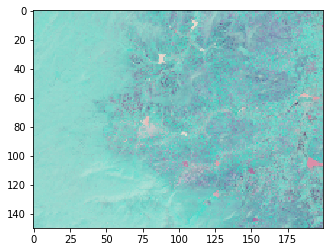

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
band2 = plt.imread('datas/band2.tif')
band3 = plt.imread('datas/band3.tif')
band4 = plt.imread('datas/band4.tif')

foo = np.empty((band2.shape[0], band2.shape[1], 3))
foo[:,:,2] = band2
foo[:,:,1] = band3
foo[:,:,0] = band4

plt.imshow(foo, interpolation='nearest')

`pcolor`代表伪彩色，用于在绘制图形时增加数据的对比度。`colorbar`用于显示颜色地图。颜色地图类型通过使用`cmap`作为`pcolor`的输入来控制。图7.5显示了伪彩色图。

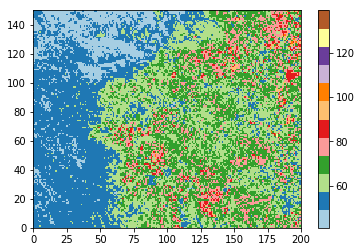

In [8]:
plt.pcolor(band2, cmap=plt.cm.Paired)
plt.colorbar()
plt.ylim(ymax=band2.shape[0])
plt.show()

<center>图7.5:使用伪彩色的二维图</center>

我们将使用band2数据来绘制等高线。因为`band2`数据由很高的空间变异形，我们将首先使用中值过滤器过滤它。

In [19]:
from scipy.signal import medfilt2d
data = medfilt2d(band2,kernel_size=7)

`plt.contour`用于绘制等高线。默认情况下，它不显示轮廓值，为了显示等高线标签，我们使用`plt.clabel`。图7.6显示了等高线图和等高线标注。

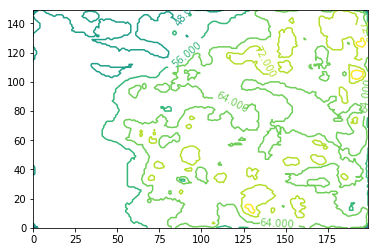

In [20]:
CS = plt.contour(data,10)
plt.clabel(CS,inline=1,fontsize=10)
plt.show()

<center>图7.6:图形显示等高线和等高线标注</center>

`plt.contour`提供了空的等高线，即在连续的等高线之间没有颜色。我们可以使用`contourf`来绘制填充等高线图。图7.7显示了填充等高线图。

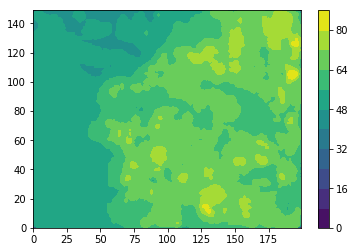

In [21]:
plt.contourf(data,10)
plt.colorbar()
plt.show()

<center>图7.7:使用contourf绘制的填充等高线图</center>